#**ANÁLISIS DEL DATASET: Mobibrain**

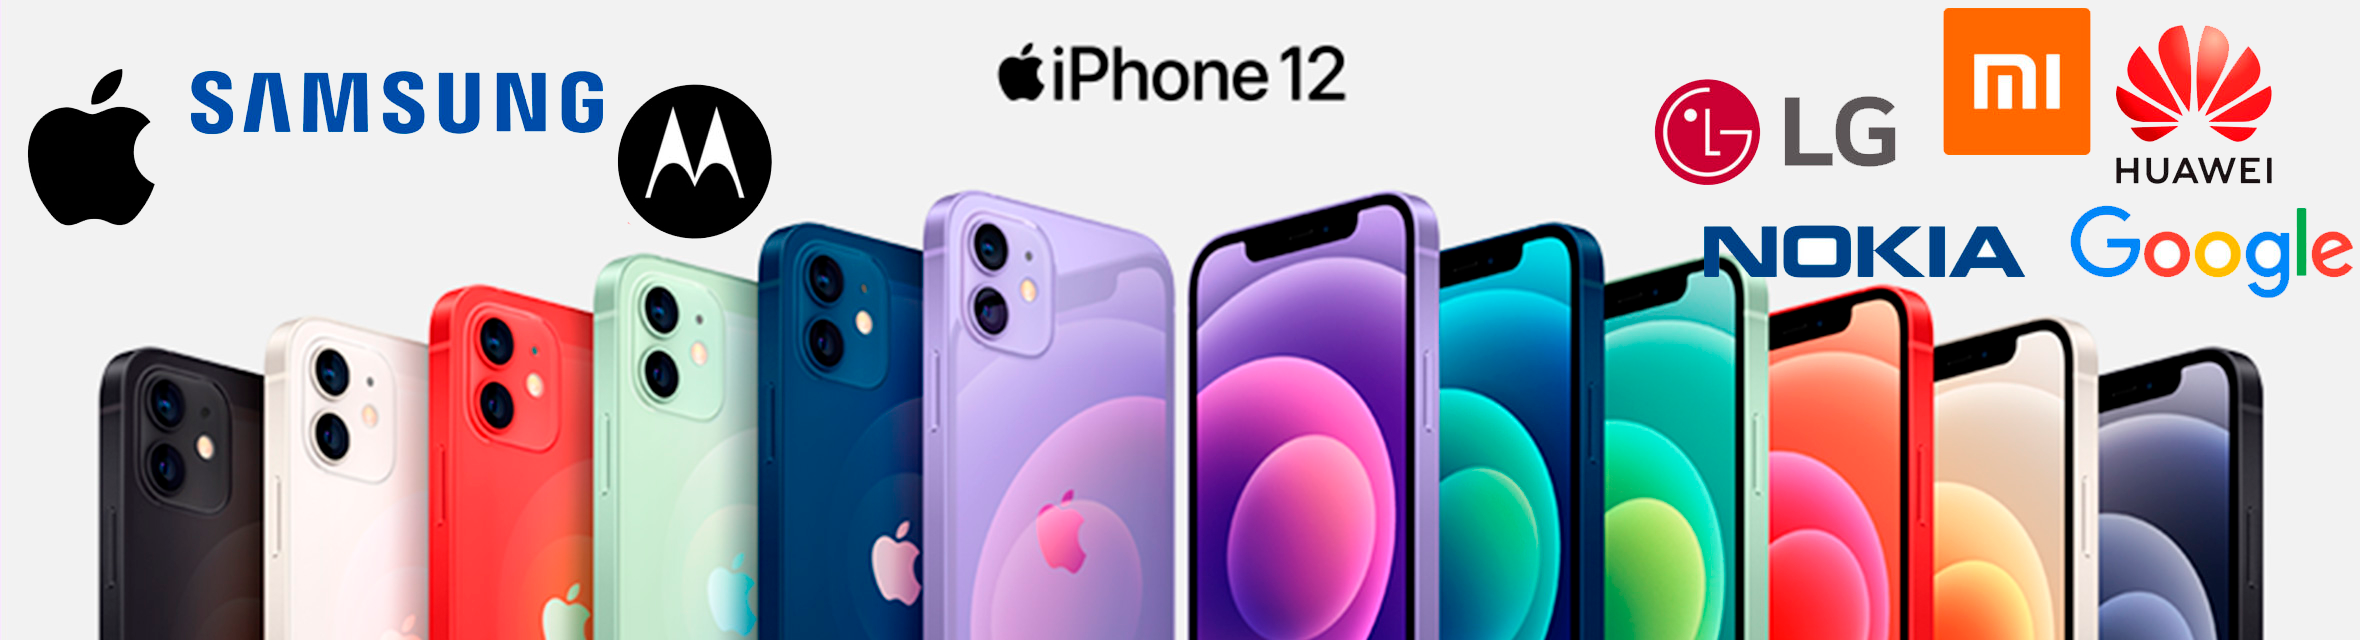

##INTEGRANTES:
*  Sofía Pinilla Diaz 2215607
*  Kevin Andres Gallardo Robles 2191918
*  Jenifer Karina Alfonso Carreño 2215109






#INTRODUCCIÓN
El avance de la tecnología ha impulsado el desarrollo de dispositivos móviles cada vez más sofisticados, los cuales desempeñan un papel crucial en la vida cotidiana de las personas. La cantidad de datos generados por estos dispositivos permite realizar análisis avanzados para identificar tendencias, patrones de uso y preferencias del mercado. En este contexto, la Inteligencia Artificial (IA) se ha convertido en una herramienta fundamental para la interpretación y predicción de comportamientos en la industria de los dispositivos móviles.

Este proyecto tiene como objetivo analizar el dataset "Mobiles Dataset 2025" disponible en Kaggle, el cual contiene información relevante sobre distintos modelos de teléfonos inteligentes, incluyendo especificaciones técnicas, precios y características de rendimiento.

# **OBJETIVOS**
##**Objetivo General:**
*   Desarrollar e implementar soluciones de Inteligencia Artificial en la industria de dispositivos móviles para mejorar la eficiencia en la clasificación, predicción de tendencias de mercado y optimización del rendimiento de los productos, facilitando la toma de decisiones estratégicas basadas en datos.
##**Objetivo Específicos:**

1. Analizar y procesar datos del dataset de móviles 2025 de Kaggle para extraer información relevante sobre las características y el rendimiento de los dispositivos.
2. Desarrollar modelos de aprendizaje automático para predecir atributos clave de los dispositivos móviles, como precio, duración de la batería y nivel de demanda en el mercado.
3. Optimizar la precisión y eficiencia de los modelos a través de técnicas de ajuste de hiperparámetros y selección de características más relevantes.

#JUSTIFICACIÓN
El uso de IA en el análisis de datos de dispositivos móviles permite predecir tendencias, optimizar producción y mejorar la experiencia del usuario. Este proyecto aprovecha los atributos del dataset para desarrollar modelos predictivos y extraer patrones útiles para la industria y la academia.


# **Libs**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import csv
from tabulate import tabulate
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, probplot, norm
import subprocess, zipfile, os

#**Descargar Dataset**





In [ ]:
url = "https://www.kaggle.com/api/v1/datasets/download/abdulmalik1518/mobiles-dataset-2025"
archivo_destino = "mobiles-dataset-2025.zip"
subprocess.run(["curl", "-L", "-o", archivo_destino, url])
with zipfile.ZipFile(archivo_destino, 'r') as zip_ref:
    zip_ref.extractall(".")
os.remove(archivo_destino)

#**Conjunto de datos**

In [ ]:
df = pd.read_csv('Mobiles Dataset (2025).csv', encoding="latin1")
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


##Información de cada columna
- **Nombre de la empresa:** La marca o fabricante del teléfono móvil.  
- **Nombre del modelo:** El modelo específico del teléfono inteligente.  
- **Peso del móvil:** El peso del teléfono móvil (en gramos).  
- **RAM:** La cantidad de memoria RAM (Random Access Memory) en el dispositivo (en GB).  
- **Cámara frontal:** La resolución de la cámara frontal (selfie) (en MP).  
- **Cámara trasera:** La resolución de la cámara principal trasera (en MP).  
- **Procesador:** El chipset o procesador utilizado en el dispositivo.  
- **Capacidad de la batería:** El tamaño de la batería del teléfono inteligente (en mAh).  
- **Tamaño de la pantalla:** El tamaño de la pantalla del teléfono inteligente (en pulgadas).  
- **Precio de lanzamiento (Pakistán, India, China, EE.UU., Dubái):** El precio oficial de lanzamiento del móvil en el respectivo país en el momento de su lanzamiento.  
  Los precios varían según el año en que se lanzó el móvil.  
- **Año de lanzamiento:** El año en que el teléfono móvil fue lanzado oficialmente.

In [ ]:
df.dtypes

,0
Company Name,object
Model Name,object
Mobile Weight,object
RAM,object
Front Camera,object
Back Camera,object
Processor,object
Battery Capacity,object
Screen Size,object
Launched Price (Pakistan),object


In [ ]:
df.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


# **Procesamiento del dataset**

In [ ]:
import re, math
# Funcion para formatear las columnas de camara
def format_camera_specs(spec_string):
    if not isinstance(spec_string, str) or not spec_string.strip():
        return 0, 0.0
    processed_string = spec_string.strip()
    if '/' in processed_string:
        processed_string = processed_string.split('/', 1)[0].strip()
    if ',' in processed_string:
         processed_string = processed_string.split(',', 1)[0].strip()
    camera_units = processed_string.split('+')
    num_cameras = len(camera_units)
    total_mp = 0.0
    mp_pattern = re.compile(r'(\d+(\.\d+)?)\s*MP', re.IGNORECASE)
    for unit in camera_units:
        unit = unit.strip()
        match = mp_pattern.search(unit)
        if match:
            try:
                mp_value = float(match.group(1))
                total_mp += mp_value
            except (ValueError, IndexError):
                pass
    if num_cameras == 1 and total_mp == 0.0 and 'MP' not in spec_string.upper():
         num_cameras = 0
    if len(camera_units) == 1 and total_mp == 0.0 :
        original_match = mp_pattern.search(spec_string)
        if not original_match:
            num_cameras = 0
    return num_cameras, total_mp

def format_price_usd(price_string):
    if not isinstance(price_string, str):
        return math.nan
    if price_string == 'USD 396,22':
      return float('396.22')
    cleaned_string = price_string.strip()
    cleaned_string = re.sub(r'^USD\s*', '', cleaned_string, flags=re.IGNORECASE)
    cleaned_string = cleaned_string.replace(',', '')
    try:
        price_float = float(cleaned_string)
        return price_float
    except ValueError:
        return math.nan

# Función para extraer números de columnas con valores alfanuméricos
def extract_numbers(series):
    return series.str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Convertir columnas numéricas
df["Mobile Weight"] = extract_numbers(df["Mobile Weight"])
df["Battery Capacity"] = df['Battery Capacity'].str.replace(",", "")
df["Battery Capacity"] = extract_numbers(df["Battery Capacity"])
df["Screen Size"] = extract_numbers(df["Screen Size"])
df["RAM"] = extract_numbers(df["RAM"])

# Convertir precios a valores numéricos
price_columns = [
    "Launched Price (Pakistan)",
    "Launched Price (India)",
    "Launched Price (China)",
    "Launched Price (Dubai)",
]

for col in price_columns:
    df[col] = extract_numbers(df[col])

# Conver precios de USD
df["Launched Price (USA)"] = df["Launched Price (USA)"].apply(format_price_usd)
# Convertir columnas de cámara
df["Front Camera"], df["Front Camera MP"] = zip(*df["Front Camera"].apply(format_camera_specs))
df["Back Camera"], df["Back Camera MP"] = zip(*df["Back Camera"].apply(format_camera_specs))
# Verificar los cambios
df.dtypes

,0
Company Name,object
Model Name,object
Mobile Weight,float64
RAM,float64
Front Camera,int64
Back Camera,int64
Processor,object
Battery Capacity,float64
Screen Size,float64
Launched Price (Pakistan),float64


In [ ]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Front Camera MP,Back Camera MP
0,Apple,iPhone 16 128GB,174.0,6.0,1,1,A17 Bionic,3600.0,6.1,224.0,79.0,5.0,799.0,2.0,2024,12.0,48.0
1,Apple,iPhone 16 256GB,174.0,6.0,1,1,A17 Bionic,3600.0,6.1,234.0,84.0,6.0,849.0,2.0,2024,12.0,48.0
2,Apple,iPhone 16 512GB,174.0,6.0,1,1,A17 Bionic,3600.0,6.1,244.0,89.0,6.0,899.0,3.0,2024,12.0,48.0
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,1,1,A17 Bionic,4200.0,6.7,249.0,89.0,6.0,899.0,3.0,2024,12.0,48.0
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,1,1,A17 Bionic,4200.0,6.7,259.0,94.0,6.0,949.0,3.0,2024,12.0,48.0


#**Primera entrega**

Text(0.5, 1.0, 'Distribución de la Capacidad de Batería')

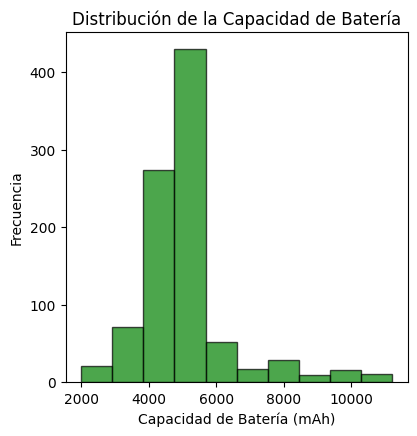

In [ ]:
plt.figure(figsize=(15, 10))
# 2. Histograma para capacidad de la batería
plt.subplot(2, 3, 2)
plt.hist(df["Battery Capacity"].dropna(), bins=10, color='green', edgecolor='black', alpha=0.7)
plt.xlabel("Capacidad de Batería (mAh)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Capacidad de Batería")

Text(0.5, 1.0, 'Distribución del Tamaño de Pantalla')

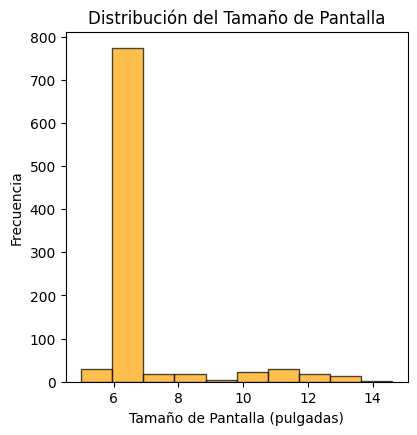

In [ ]:
plt.figure(figsize=(15, 10))
# 3. Histograma para tamaño de pantalla
plt.subplot(2, 3, 3)
plt.hist(df["Screen Size"].dropna(), bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Tamaño de Pantalla (pulgadas)")
plt.ylabel("Frecuencia")
plt.title("Distribución del Tamaño de Pantalla")

Text(0.5, 1.0, 'Cantidad de Modelos por Año de Lanzamiento')

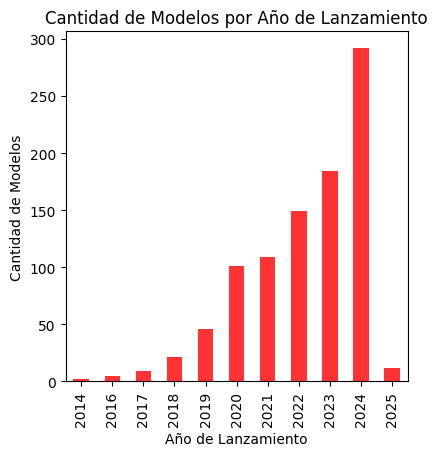

In [ ]:
plt.figure(figsize=(15, 10))
# 4. Gráfico de barras para el año de lanzamiento
plt.subplot(2, 3, 4)
df["Launched Year"].value_counts().sort_index().plot(kind='bar', color='red', alpha=0.8)
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Cantidad de Modelos")
plt.title("Cantidad de Modelos por Año de Lanzamiento")

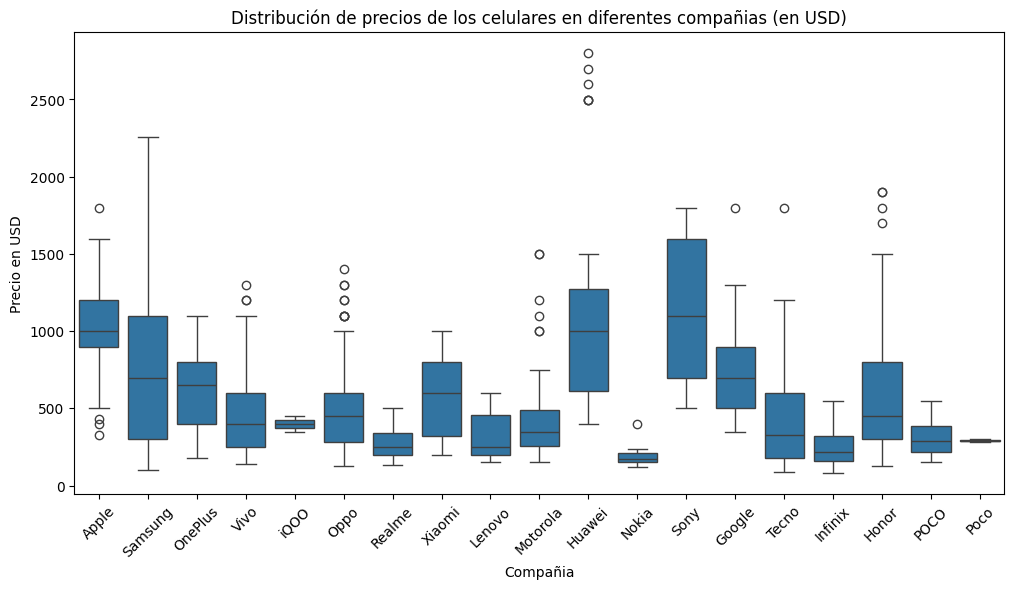

In [ ]:
plt.figure(figsize=(12, 6))

# Crear el boxplot con precios convertidos a USD
sns.boxplot(data=df, x="Company Name", y="Launched Price (USA)")

# Configurar etiquetas y título
plt.title("Distribución de precios de los celulares en diferentes compañias (en USD)")
plt.xlabel("Compañia")
plt.ylabel("Precio en USD")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

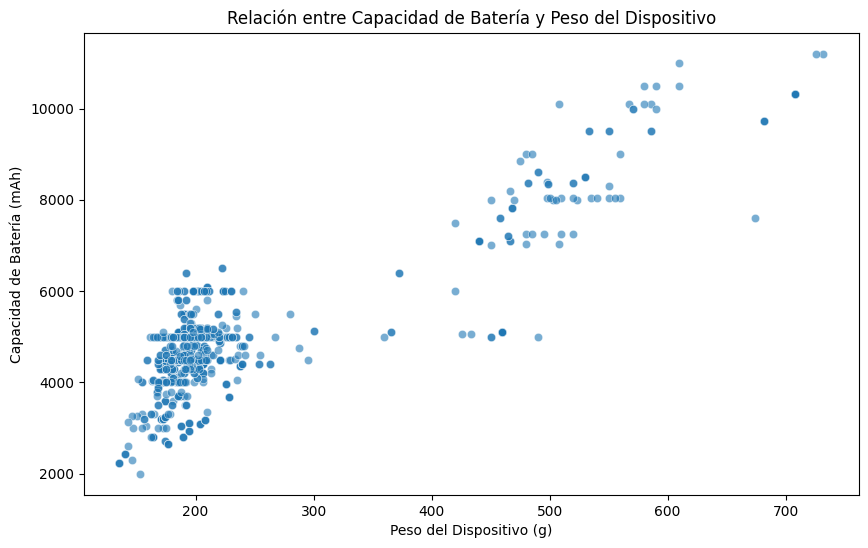

In [ ]:
# Crear un gráfico de dispersión (scatter plot) para la relación entre batería y peso
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Mobile Weight", y="Battery Capacity", alpha=0.6)

# Configurar etiquetas y título
plt.title("Relación entre Capacidad de Batería y Peso del Dispositivo")
plt.ylabel("Capacidad de Batería (mAh)")
plt.xlabel("Peso del Dispositivo (g)")

# Mostrar el gráfico
plt.show()

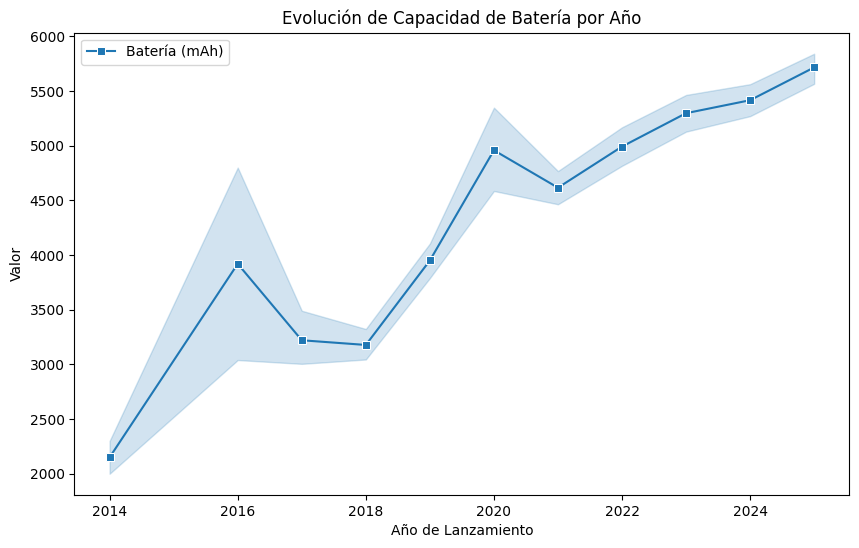

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Launched Year", y="Battery Capacity", marker="s", label="Batería (mAh)")
plt.title("Evolución de Capacidad de Batería por Año")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Valor")
plt.legend()
plt.show()

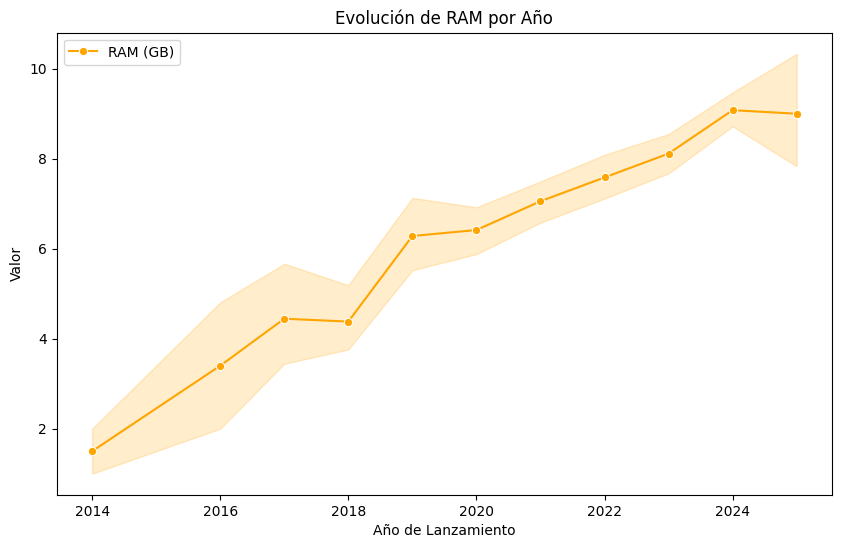

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Launched Year", y="RAM", marker="o", label="RAM (GB)", color="orange")
plt.title("Evolución de RAM por Año")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Valor")
plt.legend()
plt.show()

# **Segunda entrega**

### Preprocesamiento de datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Aplicar one-hot encoding solo a la columna 'Processor'
df_encoded = pd.get_dummies(df, columns=["Processor"], prefix='Processor', drop_first=True)

# Definir X e y
y = df_encoded["Launched Price (USA)"]
X = df_encoded.drop(columns=[
    "Launched Price (Pakistan)", "Launched Price (India)",
    "Launched Price (China)", "Launched Price (USA)",
    "Launched Price (Dubai)", "Model Name", "Launched Year",
    "Company Name"
])
# Dividir Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Mostrar forma de los datos para confirmar
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("Forma de los datos de entrenamiento:", X_train.shape)
print("Forma de los datos de prueba:", X_test.shape)
print("Forma del vector objetivo de entrenamiento:", y_train.shape)
print("Forma del vector objetivo de prueba:", y_test.shape)

Forma de los datos de entrenamiento: (744, 224)
Forma de los datos de prueba: (186, 224)
Forma del vector objetivo de entrenamiento: (744,)
Forma del vector objetivo de prueba: (186,)


## Stimators: DT, RF, SVM

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Creación de instancias de los modelos
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()

# Entrenamiento de los modelos
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predicción sobre datos nuevos (test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluación del rendimiento de los modelos
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print("MAE Decision Tree:", mae_dt)
print("MAE Random Forest:", mae_rf)
print("MAE Support Vector Machine:", mae_svm)


MAE Decision Tree: 109.46301075268819
MAE Random Forest: 106.2235834835684
MAE Support Vector Machine: 357.19926329291303


## Learning Curves: DT, RF, SVM

####DecisionTree

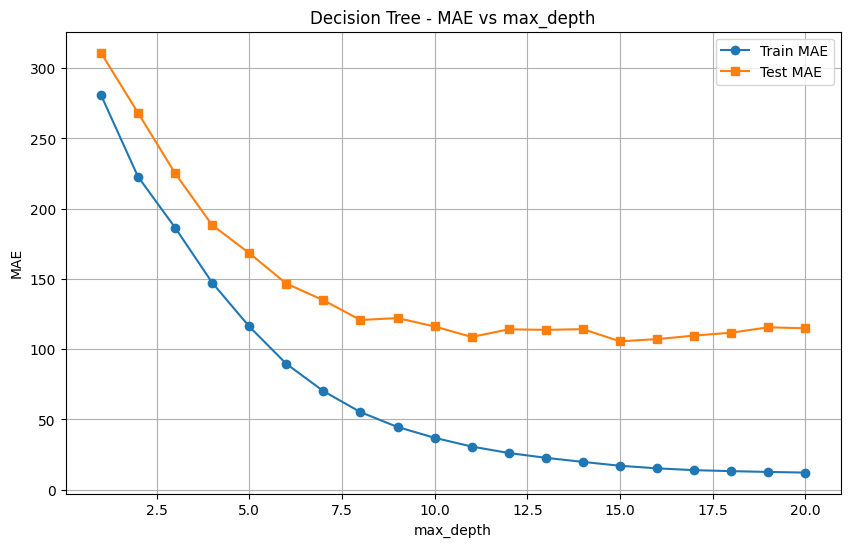

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

max_depths = range(1, 21)
dt_mae_train = []
dt_mae_test = []

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    dt_mae_train.append(mean_absolute_error(y_train, y_train_pred))
    dt_mae_test.append(mean_absolute_error(y_test, y_test_pred))

# Graficar
plt.figure(figsize=(10,6))
plt.plot(max_depths, dt_mae_train, label="Train MAE", marker="o")
plt.plot(max_depths, dt_mae_test, label="Test MAE", marker="s")
plt.xlabel("max_depth")
plt.ylabel("MAE")
plt.title("Decision Tree - MAE vs max_depth")
plt.legend()
plt.grid(True)
plt.show()


###RandomForest

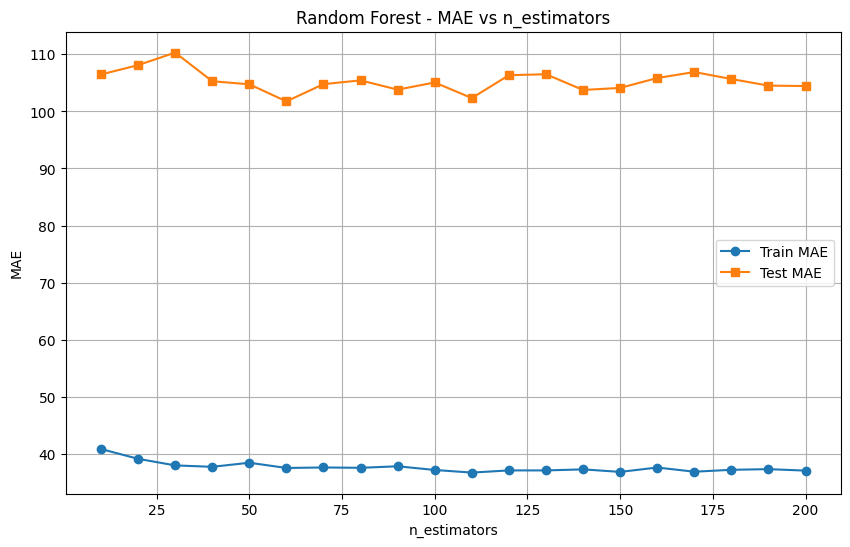

In [ ]:
n_estimators = range(10, 210, 10)
rf_mae_train = []
rf_mae_test = []

for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rf_mae_train.append(mean_absolute_error(y_train, y_train_pred))
    rf_mae_test.append(mean_absolute_error(y_test, y_test_pred))

# Graficar
plt.figure(figsize=(10,6))
plt.plot(n_estimators, rf_mae_train, label="Train MAE", marker="o")
plt.plot(n_estimators, rf_mae_test, label="Test MAE", marker="s")
plt.xlabel("n_estimators")
plt.ylabel("MAE")
plt.title("Random Forest - MAE vs n_estimators")
plt.legend()
plt.grid(True)
plt.show()


###SVM

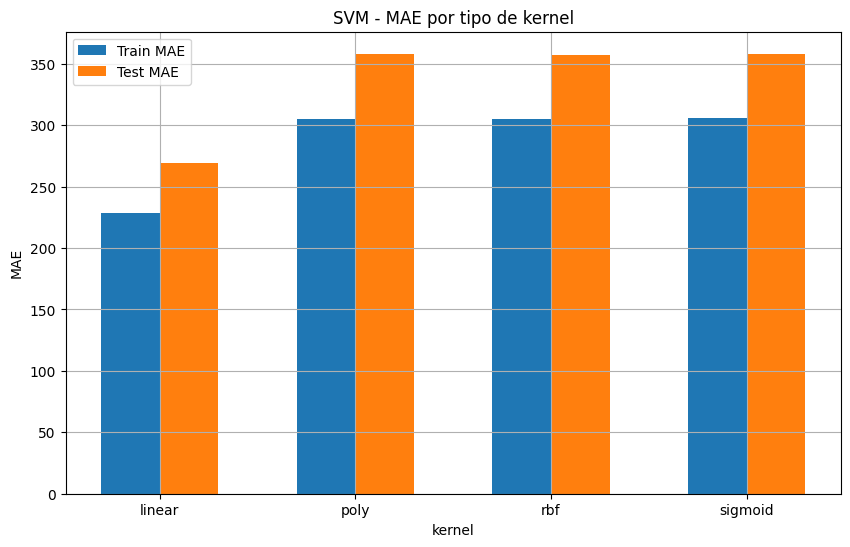

In [ ]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
svm_mae_train = []
svm_mae_test = []

for k in kernels:
    model = SVR(kernel=k)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    svm_mae_train.append(mean_absolute_error(y_train, y_train_pred))
    svm_mae_test.append(mean_absolute_error(y_test, y_test_pred))

# Graficar
x = np.arange(len(kernels))

plt.figure(figsize=(10,6))
plt.bar(x - 0.15, svm_mae_train, width=0.3, label="Train MAE")
plt.bar(x + 0.15, svm_mae_test, width=0.3, label="Test MAE")
plt.xticks(x, kernels)
plt.xlabel("kernel")
plt.ylabel("MAE")
plt.title("SVM - MAE por tipo de kernel")
plt.legend()
plt.grid(True)
plt.show()


## Learning Curves: Cross Validation

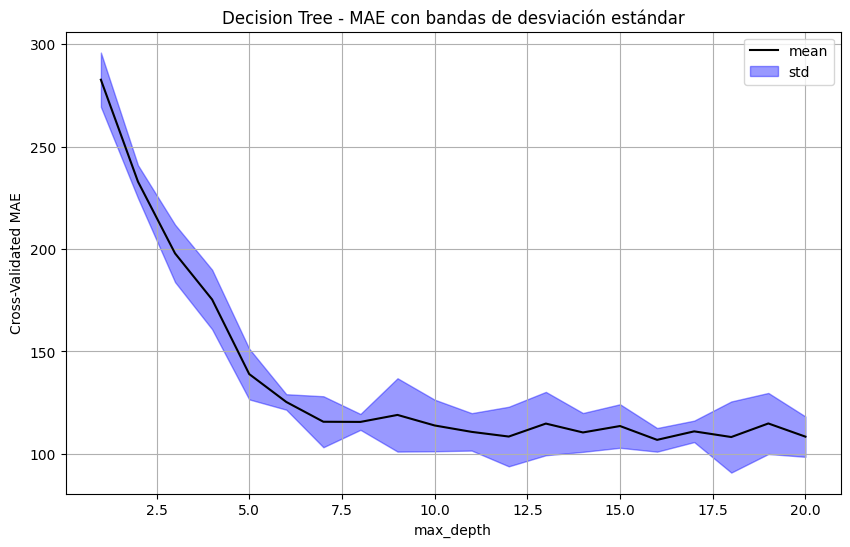

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

max_depths = range(1, 21)
mean_mae_cv = []
std_mae_cv = []

kf = KFold(n_splits=5, shuffle=True)

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    mae_scores = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    mean_mae_cv.append(mae_scores.mean())
    std_mae_cv.append(mae_scores.std())

# Convertimos a arrays para facilitar el uso en matplotlib
mean_mae_cv = np.array(mean_mae_cv)
std_mae_cv = np.array(std_mae_cv)

# Graficamos
plt.figure(figsize=(10,6))
plt.plot(max_depths, mean_mae_cv, color="black", label="mean")
plt.fill_between(max_depths, mean_mae_cv - std_mae_cv, mean_mae_cv + std_mae_cv,
                 alpha=0.4, color="blue", label="std")
plt.xlabel("max_depth")
plt.ylabel("Cross-Validated MAE")
plt.title("Decision Tree - MAE con bandas de desviación estándar")
plt.legend()
plt.grid(True)
plt.show()


# **Tercera Entrega**

## Preprocesamiento de los datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# Preparación de datos
# Aplicar one-hot encoding solo a la columna 'Processor'
df_encoded = pd.get_dummies(df, columns=["Processor"], prefix='Processor', drop_first=True)

# Definir variable objetivo
y = df_encoded["Launched Price (USA)"]

# Remover columnas no relevantes (precios de otros países, identificadores, etc.)
columns_to_drop = [
    "Launched Price (Pakistan)", "Launched Price (India)",
    "Launched Price (China)", "Launched Price (USA)",
    "Launched Price (Dubai)", "Model Name", "Launched Year",
    "Company Name"
]

X = df_encoded.drop(columns=columns_to_drop)

# Filtrar datos válidos (sin NaN en target)
valid_indices = y.notna()
X = X[valid_indices]
y = y[valid_indices]

# Llenar valores faltantes en features con 0 (principalmente para características numéricas)
X = X.fillna(0)

print(f"Forma de X después de preparación: {X.shape}")
print(f"Características incluidas: {list(X.columns)[:10]}...")  # Mostrar primeras 10
print(f"Total de características: {X.shape[1]}")

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Forma de X después de preparación: (930, 224)
Características incluidas: ['Mobile Weight', 'RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 'Screen Size', 'Front Camera MP', 'Back Camera MP', 'Processor_A12 Bionic', 'Processor_A12Z Bionic']...
Total de características: 224


## Redes neuronales - multicapa (3, 6 y 10)

In [ ]:
# Implementación de redes neuronales para regresión
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Normalizar datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

print(f"Forma de datos de entrenamiento: {X_train_scaled.shape}")
print(f"Forma de datos de prueba: {X_test_scaled.shape}")

# Función para crear modelo
def create_model(hidden_layers, neurons=128, input_dim=None):
    model = Sequential()

    # Primera capa oculta
    model.add(Dense(neurons, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))

    # Capas ocultas adicionales
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(0.2))

    # Capa de salida (regresión)
    model.add(Dense(1, activation='linear'))

    return model

# Configuraciones de modelos
configs = [
    {'layers': 3, 'name': '3_capas'},
    {'layers': 6, 'name': '6_capas'},
    {'layers': 10, 'name': '10_capas'}
]

# Entrenar y evaluar cada configuración
results = {}

for config in configs:
    print(f"\n{'='*50}")
    print(f"Entrenando modelo con {config['layers']} capas ocultas")
    print(f"{'='*50}")

    # Crear modelo
    model = create_model(
        hidden_layers=config['layers'],
        neurons=128,
        input_dim=X_train_scaled.shape[1]
    )

    # Compilar modelo
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',  # Mean Squared Error para regresión
        metrics=['mae']  # Mean Absolute Error como métrica
    )

    # Entrenar modelo
    history = model.fit(
        X_train_scaled, y_train_scaled,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Hacer predicciones
    y_pred_scaled = model.predict(X_test_scaled)

    # Desnormalizar predicciones
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Guardar resultados
    results[config['name']] = {
        'model': model,
        'history': history,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'predictions': y_pred
    }

    print(f"\nResultados para {config['layers']} capas:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Resumen comparativo
print(f"\n{'='*60}")
print("RESUMEN COMPARATIVO DE MODELOS")
print(f"{'='*60}")
print(f"{'Modelo':<12} {'MSE':<12} {'MAE':<12} {'RMSE':<12}")
print("-" * 60)

for name, result in results.items():
    print(f"{name:<12} {result['mse']:<12.2f} {result['mae']:<12.2f} {result['rmse']:<12.2f}")

# Identificar mejor modelo
best_model_name = min(results.keys(), key=lambda x: results[x]['mse'])
print(f"\nMejor modelo (menor MSE): {best_model_name}")
print(f"MSE: {results[best_model_name]['mse']:.2f}")
print(f"MAE: {results[best_model_name]['mae']:.2f}")
print(f"RMSE: {results[best_model_name]['rmse']:.2f}")

# Mostrar algunas predicciones vs valores reales
print(f"\nEjemplos de predicciones vs valores reales (mejor modelo):")
print(f"{'Real':<10} {'Predicho':<10} {'Error':<10}")
print("-" * 30)
best_predictions = results[best_model_name]['predictions'].flatten()
for i in range(min(10, len(y_test))):
    real = y_test.iloc[i]
    pred = best_predictions[i]
    error = abs(real - pred)
    print(f"{real:<10.2f} {pred:<10.2f} {error:<10.2f}")

Forma de datos de entrenamiento: (744, 224)
Forma de datos de prueba: (186, 224)

Entrenando modelo con 3 capas ocultas
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.3736 - mae: 0.9129 - val_loss: 0.7254 - val_mae: 0.6567
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8370 - mae: 0.6937 - val_loss: 0.5571 - val_mae: 0.5633
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6874 - mae: 0.6188 - val_loss: 0.4142 - val_mae: 0.4615
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6800 - mae: 0.5803 - val_loss: 0.3833 - val_mae: 0.3996
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4208 - mae: 0.4675 - val_loss: 0.3226 - val_mae: 0.3737
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3972 - mae: 0.4494 - val_loss: 0.2892 - val_mae: 0.3546
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3569 - mae: 0.4302 - val_loss: 0.2838 - val_mae: 0.3462
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3420 -

## PCA y Clustering - K-Means y DBScan

Forma original del dataset: (930, 224)
Forma después de PCA: (930, 2)
Varianza explicada por componente: [0.01620855 0.01266022]
Varianza total explicada: 0.0289

Resultados K-Means:
Número de clusters: 3
Inercia: 1574.13

Resultados DBSCAN:
Número de clusters encontrados: 10
Número de puntos de ruido: 10


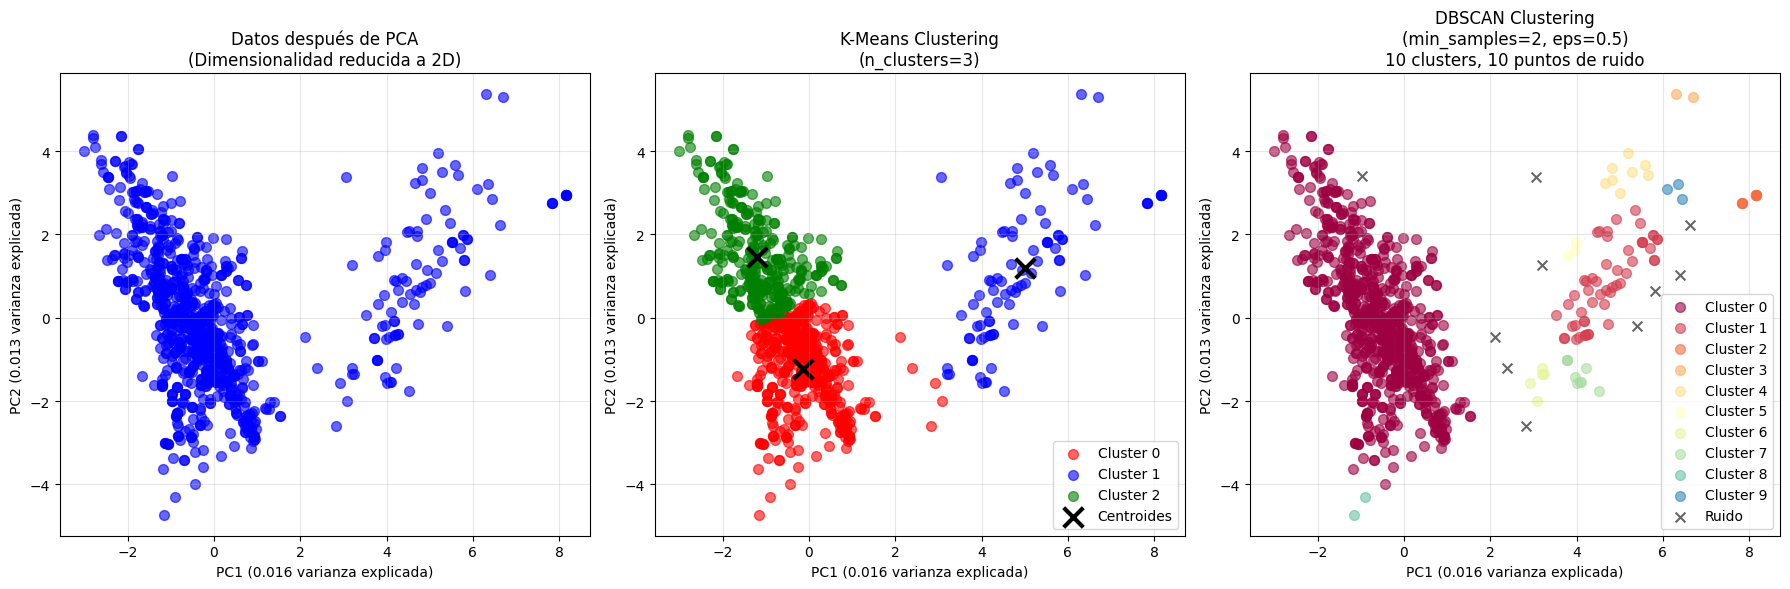


INFORMACIÓN DETALLADA DE CLUSTERING

K-Means - Distribución de puntos por cluster:
Cluster 0: 499 puntos (53.7%)
Cluster 1: 94 puntos (10.1%)
Cluster 2: 337 puntos (36.2%)

DBSCAN - Distribución de puntos por cluster:
Ruido: 10 puntos (1.1%)
Cluster 0: 828 puntos (89.0%)
Cluster 1: 52 puntos (5.6%)
Cluster 2: 8 puntos (0.9%)
Cluster 3: 2 puntos (0.2%)
Cluster 4: 8 puntos (0.9%)
Cluster 5: 3 puntos (0.3%)
Cluster 6: 5 puntos (0.5%)
Cluster 7: 9 puntos (1.0%)
Cluster 8: 2 puntos (0.2%)
Cluster 9: 3 puntos (0.3%)

Centroides de K-Means:
Cluster 0: PC1=-0.134, PC2=-1.218
Cluster 1: PC1=4.997, PC2=1.207
Cluster 2: PC1=-1.196, PC2=1.466

Componentes principales:
PC1 explica 1.6% de la varianza total
PC2 explica 1.3% de la varianza total
Total explicado: 2.9%


In [ ]:
# PCA y Clustering - K-Means y DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Usar los datos ya preparados (X, y)
print(f"Forma original del dataset: {X.shape}")

# Normalizar los datos antes de PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Forma después de PCA: {X_pca.shape}")
print(f"Varianza explicada por componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {pca.explained_variance_ratio_.sum():.4f}")

# K-Means con n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_centroids = kmeans.cluster_centers_

# DBSCAN con min_samples=2
dbscan = DBSCAN(min_samples=2, eps=0.5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Contar clusters y puntos de ruido en DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nResultados K-Means:")
print(f"Número de clusters: 3")
print(f"Inercia: {kmeans.inertia_:.2f}")

print(f"\nResultados DBSCAN:")
print(f"Número de clusters encontrados: {n_clusters_dbscan}")
print(f"Número de puntos de ruido: {n_noise}")

# Crear visualizaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Datos originales después de PCA
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue', s=50)
axes[0].set_title('Datos después de PCA\n(Dimensionalidad reducida a 2D)', fontsize=12)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f} varianza explicada)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f} varianza explicada)')
axes[0].grid(True, alpha=0.3)

# Plot 2: K-Means
colors_kmeans = ['red', 'blue', 'green']
for i in range(3):
    cluster_points = X_pca[kmeans_labels == i]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=colors_kmeans[i], label=f'Cluster {i}', alpha=0.6, s=50)

# Plotear centroides de K-Means
axes[1].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1],
               c='black', marker='x', s=200, linewidths=3, label='Centroides')
axes[1].set_title('K-Means Clustering\n(n_clusters=3)', fontsize=12)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f} varianza explicada)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f} varianza explicada)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: DBSCAN
unique_labels = set(dbscan_labels)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        # Puntos de ruido en negro
        class_member_mask = (dbscan_labels == k)
        xy = X_pca[class_member_mask]
        axes[2].scatter(xy[:, 0], xy[:, 1], c='black', marker='x',
                       s=50, alpha=0.6, label='Ruido')
    else:
        class_member_mask = (dbscan_labels == k)
        xy = X_pca[class_member_mask]
        axes[2].scatter(xy[:, 0], xy[:, 1], c=[col],
                       label=f'Cluster {k}', alpha=0.6, s=50)

axes[2].set_title(f'DBSCAN Clustering\n(min_samples=2, eps=0.5)\n{n_clusters_dbscan} clusters, {n_noise} puntos de ruido', fontsize=12)
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f} varianza explicada)')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f} varianza explicada)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Información adicional sobre los clusters
print(f"\n{'='*60}")
print("INFORMACIÓN DETALLADA DE CLUSTERING")
print(f"{'='*60}")

print(f"\nK-Means - Distribución de puntos por cluster:")
unique_kmeans, counts_kmeans = np.unique(kmeans_labels, return_counts=True)
for cluster, count in zip(unique_kmeans, counts_kmeans):
    print(f"Cluster {cluster}: {count} puntos ({count/len(kmeans_labels)*100:.1f}%)")

print(f"\nDBSCAN - Distribución de puntos por cluster:")
unique_dbscan, counts_dbscan = np.unique(dbscan_labels, return_counts=True)
for cluster, count in zip(unique_dbscan, counts_dbscan):
    if cluster == -1:
        print(f"Ruido: {count} puntos ({count/len(dbscan_labels)*100:.1f}%)")
    else:
        print(f"Cluster {cluster}: {count} puntos ({count/len(dbscan_labels)*100:.1f}%)")

print(f"\nCentroides de K-Means:")
for i, centroid in enumerate(kmeans_centroids):
    print(f"Cluster {i}: PC1={centroid[0]:.3f}, PC2={centroid[1]:.3f}")

print(f"\nComponentes principales:")
print(f"PC1 explica {pca.explained_variance_ratio_[0]:.1%} de la varianza total")
print(f"PC2 explica {pca.explained_variance_ratio_[1]:.1%} de la varianza total")
print(f"Total explicado: {pca.explained_variance_ratio_.sum():.1%}")